# Notebook 4: SVM Utilizando la Función de Pérdida (Hinge Loss)

El SVM puede ser implementado como un problema de optimización que minimiza la función de pérdida hinge loss.

### Función de Pérdida Hinge Loss

La función de pérdida hinge loss es una función de pérdida que se utiliza en el entrenamiento de clasificadores de máquinas de vectores de soporte. La función de pérdida hinge loss se define como:

\begin{equation}
L(w, b) = \frac{1}{2}||w||^2 + C \sum_{i=1}^{n} max(0, 1 - y_i(w^Tx_i + b))
\end{equation}

Donde 𝐶 es un hiperparámetro que controla la penalización por errores.

### Importación de Librerías

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [11]:
def plot_perceptron(X, y, w, b):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='b', label='Clase +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='r', label='Clase -1')
    
    # Hiperplano
    x_min, x_max = plt.xlim()
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0]*xx + b) / w[1]
    plt.plot(xx, yy, 'k-', label='Hiperplano del Perceptrón')
    
    plt.legend()
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Perceptrón en Datos Linealmente Separables')
    plt.show()

### Implementación del SVM con Hinge Loss

Usaremos un optimizador como Gradient Descent para minimizar la función de pérdida.

In [12]:
def svm_train_hinge(X, y, C=1, lr=0.001, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for epoch in range(epochs):
        # Calculamos la pérdida y el gradiente
        distances = 1 - y * (np.dot(X, w) + b)
        dw = np.zeros(n)
        db = 0
        loss = 0

        for i, d in enumerate(distances):
            if d > 0:
                dw += -C * y[i] * X[i]
                db += -C * y[i]
                loss += d
            else:
                dw += 0
                db += 0
        # Añadir la regularización
        dw = w + dw / m
        db = db / m
        loss = 0.5 * np.dot(w, w) + C * loss / m

        # Actualizar los pesos
        w -= lr * dw
        b -= lr * db

        losses.append(loss)

    return w, b, losses

### Entrenamiento del SVM con Hinge Loss en Ambos Conjuntos

**Conjunto Linealmente Separable**

In [13]:
# Generar datos linealmente separables
np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [2, 2]
X_neg = np.random.randn(N, 2) + [-2, -2]
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))

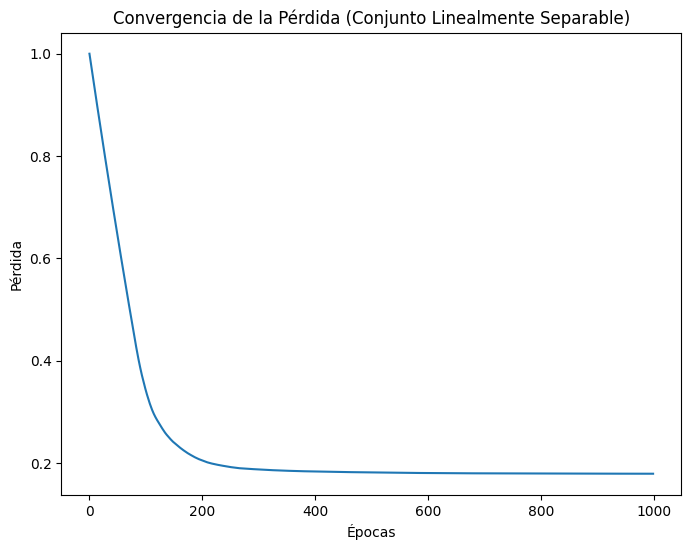

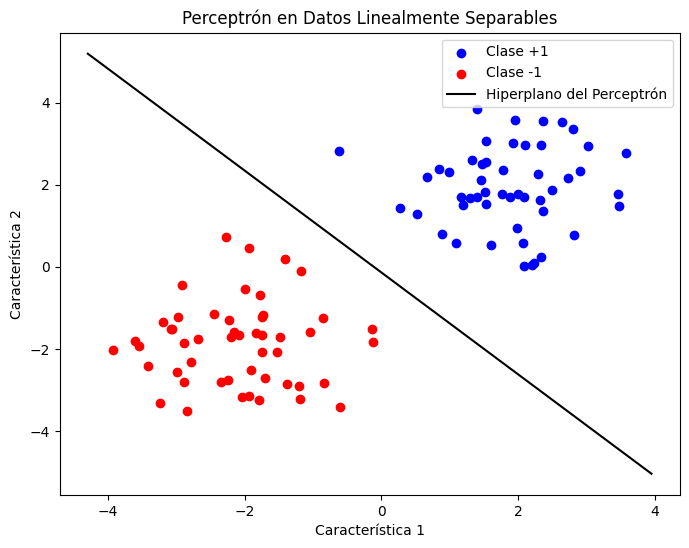

In [14]:
# Entrenar el SVM en el conjunto linealmente separable
w_svm_hinge, b_svm_hinge, losses = svm_train_hinge(X, y, C=1, lr=0.001, epochs=1000)

# Visualizar la convergencia de la pérdida
plt.figure(figsize=(8,6))
plt.plot(losses)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Convergencia de la Pérdida (Conjunto Linealmente Separable)')
plt.show()

# Visualizar el hiperplano
plot_perceptron(X, y, w_svm_hinge, b_svm_hinge)

**Comparación con el Perceptrón y el SVM Óptimo:**

El hiperplano obtenido con SVM y hinge loss debería ser similar al obtenido con el SVM de margen duro, ya que los datos son linealmente separables.

**Conjunto con Outliers y Ruido**

In [15]:
# Semilla para reproducibilidad
np.random.seed(42)
# Número de muestras por clase
N = 50
# Datos de la clase positiva
X_pos = np.random.randn(N, 2) + [2, 2]
# Datos de la clase negativa
X_neg = np.random.randn(N, 2) + [-2, -2]
# Combinar los datos
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))

# Agregar outliers a los datos
outliers_pos = np.random.randn(5, 2) + [-2, -2]
outliers_neg = np.random.randn(5, 2) + [2, 2]
X_outliers = np.vstack((outliers_pos, outliers_neg))
y_outliers = np.hstack((np.ones(5), -np.ones(5)))
# Datos finales con outliers
X = np.vstack((X, X_outliers))
y = np.hstack((y, y_outliers))

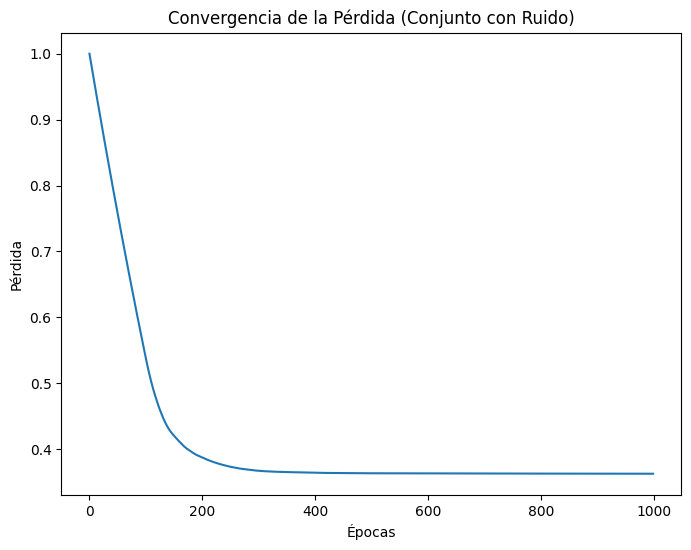

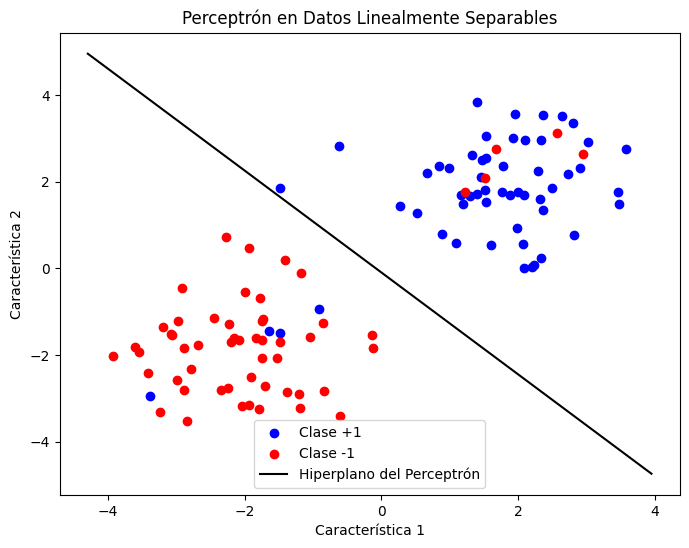

In [16]:
# Entrenar el SVM en el conjunto con ruido
w_svm_hinge_noise, b_svm_hinge_noise, losses_noise = svm_train_hinge(X, y, C=1, lr=0.001, epochs=1000)

# Visualizar la convergencia de la pérdida
plt.figure(figsize=(8,6))
plt.plot(losses_noise)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Convergencia de la Pérdida (Conjunto con Ruido)')
plt.show()

# Visualizar el hiperplano
plot_perceptron(X, y, w_svm_hinge_noise, b_svm_hinge_noise)